<a href="https://colab.research.google.com/github/min02yam/R-study/blob/main/20220515_%EC%97%B0%EA%B4%80%EC%84%B1%EB%B6%84%EC%84%9D_Groceries_%EB%8B%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--------------------------------------------------------------------------
### 3. arulesViz 패키지에 있는 Groceries 데이터 셋을 활용하여 연관성 분석을 실시하시오
---------------------------------------------------------------------------

# **목차**

### **1. 장바구니 분석(연관성 알고리즘)`arules`, `arulesViz`::<BR>**
##### ✅알고리즘: apriori, ECLAT
#### 1-1. 데이터 준비
#### 1-2. 모델링
        연관규칙찾기 
        1) soda
        2) sugar or yogurt 
        3) beer
#### 1-3. 시각화

### **2. 추천 엔진`recommender lab`::**
#### 2-1. 사용자 기반 협업 필터링(User-based collaborative filering, UBCF)
##### ✅알고리즘: KNN, 유사성 측정값(피어슨 상관계수, 코사인 유사도)
#### 2-2. 아이템 기반 협업 필터링(Item-based collaborative filtering, IBCF)<BR>
######  ✅알고리즘:유사성 측정값(피어슨 상관계수, 코사인 유사도)<BR>
#### 2-3. 특이값 분해(SVD)와 주성분 분석(PCA)
### **3. 순차적 분석기법 `TraMineR`::<br>**
###### ✅알고리즘: 전이조합, 비유사도 행렬

--------------------------------------------------------------------------------

### **1. 장바구니 분석**<br>
1) 최적 상품이나 서비스 조합 찾아내서 ⏩ 마케팅 <br>
2) 사기검출(fraud detection), 의료서비스<br>
3) if ~ then<br>
4) 아이템 세트(item set): 데이터 세트 안에서 1개 이상의 물품의 집합<br>
5) 지지도(support)
- 관심 있는 아이템 세트를 포함하는 데이터 거래의 비율<br>
- 좋은 규칙(빈도가 많은, 구성비가 높은)을 찾거나, 불필요한 연산을 줄일 때(pruning, 가지치기)의 기준

6) 신뢰도(confidence): 누가 x를 샀을 때, y를 사는 조건부 확률 `P(Y|X)`
  - X: 선행사건(antecedent), 좌변(LHS)
  - Y: 결과(cosequence), 우변(RHS)

7) 향상도(lift): 
- X,Y가 함께 일어난 지지도 / X,Y독립가정, 동시에 일어날 수 있는 확률{(X의 마지널)*(Y의 마지널) }<br>

8) ✅알고리즘
- apriori: 어떤 아이템 세트가 자주 나타나면 ⏩ 모든 부분 집합 또한 자주 나타남
  - 최소 빈도(지지도) 설정 *k=l* 
  - 지정된 지지도보다 같거나 더 긴 길이의 아이템 셋 만듦
  - *k+1* 부터 *k+n*까지 반복 ⏩ 지지도보다 낮은 아이템 셋 제거
  - 새로운 아이템 셋 발견되지 않을 때까지 반복


#### **1-1. 데이터 준비**

In [1]:
#패키지설치
install.packages("arules"); library(arules)
install.packages("arulesViz"); library(arulesViz)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘zoo’, ‘tweenr’, ‘polyclip’, ‘RcppEigen’, ‘gridExtra’, ‘RcppArmadillo’, ‘later’, ‘TSP’, ‘qap’, ‘gclus’, ‘registry’, ‘lmtest’, ‘Rcpp’, ‘ggforce’, ‘ggrepel’, ‘viridis’, ‘tidygraph’, ‘graphlayouts’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘lazyeval’, ‘seriation’, ‘vcd’, ‘igraph’, ‘scatterplot3d’, ‘ggraph’, ‘DT’, ‘plotly’, ‘visNetwork’




In [2]:
#데이터 로드
data(Groceries)
gr<-Groceries
#간단 구조 확인
head(gr)
str(gr)

transactions in sparse format with
 6 transactions (rows) and
 169 items (columns)

Formal class 'transactions' [package "arules"] with 3 slots
  ..@ data       :Formal class 'ngCMatrix' [package "Matrix"] with 5 slots
  .. .. ..@ i       : int [1:43367] 13 60 69 78 14 29 98 24 15 29 ...
  .. .. ..@ p       : int [1:9836] 0 4 7 8 12 16 21 22 27 28 ...
  .. .. ..@ Dim     : int [1:2] 169 9835
  .. .. ..@ Dimnames:List of 2
  .. .. .. ..$ : NULL
  .. .. .. ..$ : NULL
  .. .. ..@ factors : list()
  ..@ itemInfo   :'data.frame':	169 obs. of  3 variables:
  .. ..$ labels: chr [1:169] "frankfurter" "sausage" "liver loaf" "ham" ...
  .. ..$ level2: Factor w/ 55 levels "baby food","bags",..: 44 44 44 44 44 44 44 42 42 41 ...
  .. ..$ level1: Factor w/ 10 levels "canned food",..: 6 6 6 6 6 6 6 6 6 6 ...
  ..@ itemsetInfo:'data.frame':	0 obs. of  0 variables


1. transaction 클래스 즉, 희소 행렬 오브젝트(sparse matrix object)
2. #as(df, "transantions")

In [3]:
inspect(gr[1:3]) 

    items                 
[1] {citrus fruit,        
     semi-finished bread, 
     margarine,           
     ready soups}         
[2] {tropical fruit,      
     yogurt,              
     coffee}              
[3] {whole milk}          


  1.트랜잭션 데이터 확인 ✔: 1-3번 거래 목록 확인  <br>
  2.연관규칙분석 결과 확인 

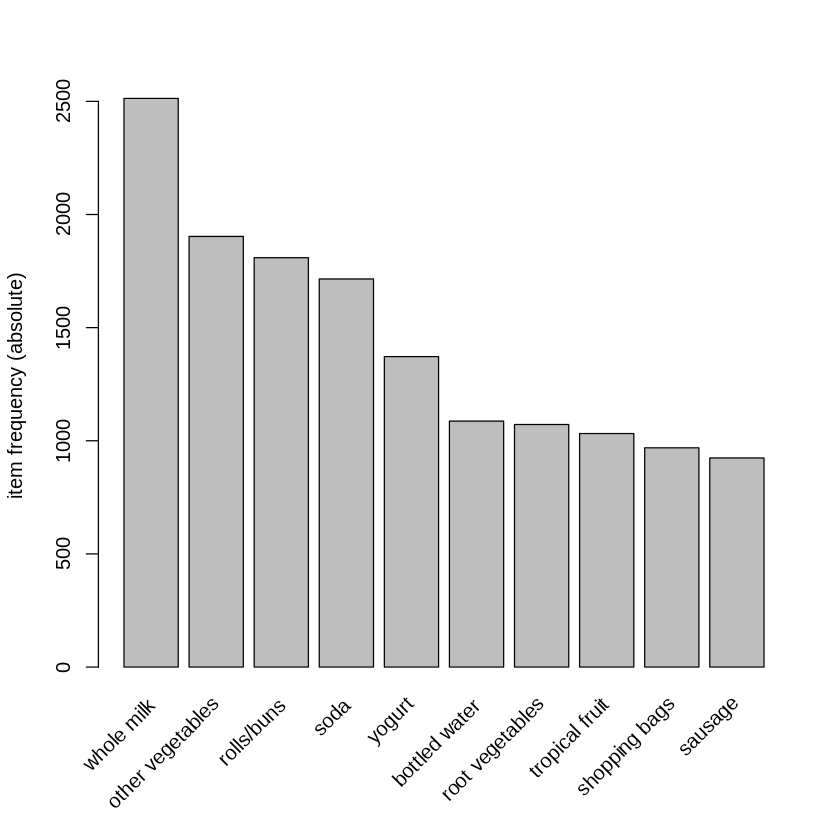

In [4]:
#데이터탐색
itemFrequencyPlot( gr, topN=10, type="absolute")

1. 가장 자주 팔린 품목: whole milk
2. 그 다음으로 야채, 롤빵, 소다, 요거트
3. 그 밑으론 비슷함

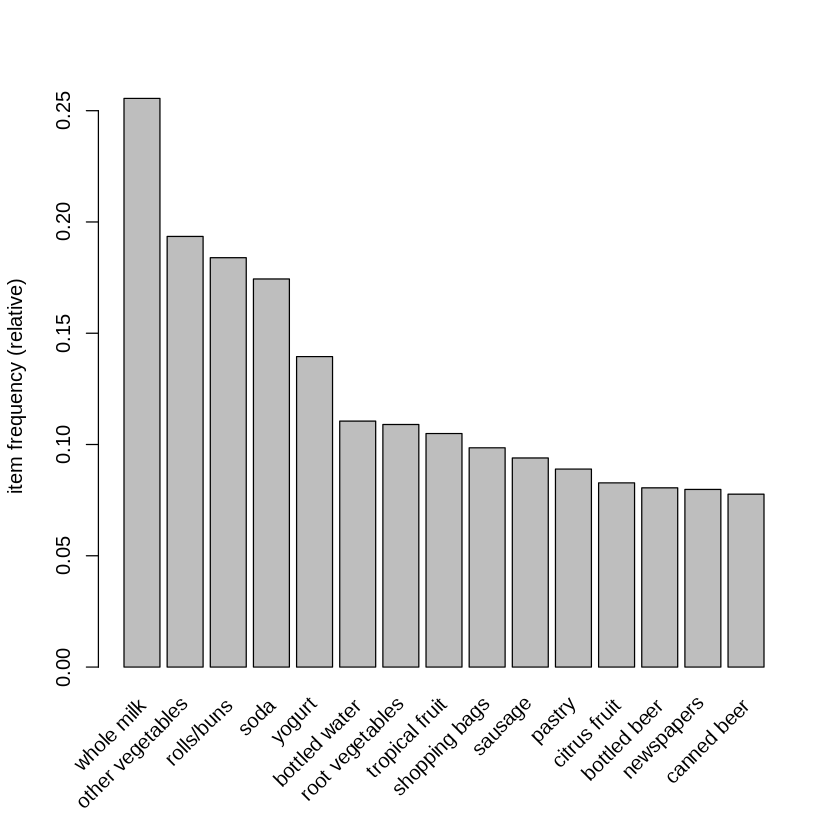

In [5]:
#상대빈도
itemFrequencyPlot(gr, topN=15)

- 맥주는 13, 15번째로 많이 팔림
-10% 미만의 소비자가 병맥주와 캔맥주를 구매함

#### **1-2. 모델링**

- parameter: 최소 지지도, 최소 신뢰도, 아이템 세트가 가질 수 있는 장바구니 크기 민맥스값

In [6]:
fit<-apriori(gr, parameter = list(supp=0.001, conf=0.9, maxlen=4))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.9    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
      4  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 9 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.00s].
sorting and recoding items ... [157 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4

Warning message in apriori(gr, parameter = list(supp = 0.001, conf = 0.9, maxlen = 4)):
“Mining stopped (maxlen reached). Only patterns up to a length of 4 returned!”


 done [0.01s].
writing ... [67 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


1. 최소 지지도: 1000거래중 1
2. 최소 신뢰도: 0.9
3. 최대 연관될 수 있는 아이템들 수: 4

In [7]:
fit # 67가지 규칙 만듦

set of 67 rules 

In [8]:
#규칙확인
options(digits = 2)
#1. 리프트값으로 확인 (내림차순으로 재정렬)
fit<-sort(fit, by="lift", decreasing = TRUE) 
#class(fit)
#summary(fit)
inspect(fit[1:5,])

    lhs                      rhs                support confidence coverage lift count
[1] {liquor,                                                                          
     red/blush wine}      => {bottled beer}      0.0019       0.90   0.0021 11.2    19
[2] {root vegetables,                                                                 
     butter,                                                                          
     cream cheese }       => {yogurt}            0.0010       0.91   0.0011  6.5    10
[3] {citrus fruit,                                                                    
     root vegetables,                                                                 
     soft cheese}         => {other vegetables}  0.0010       1.00   0.0010  5.2    10
[4] {pip fruit,                                                                       
     whipped/sour cream,                                                              
     brown bread}         => {other vegetab

1. 최소 지지도를 1000거래중 1거래로 했지만 ,, 가장 큰 향상도를 가진 규칙이 1000거래중 1.9거래를 하는건 보편적이진 않음

In [9]:
#그래서 신뢰도 기준으로 재정렬
fit<-sort(fit, by="confidence", decreasing = TRUE)
inspect(fit[1:5,])

    lhs                      rhs                support confidence coverage lift count
[1] {citrus fruit,                                                                    
     root vegetables,                                                                 
     soft cheese}         => {other vegetables}  0.0010          1   0.0010  5.2    10
[2] {pip fruit,                                                                       
     whipped/sour cream,                                                              
     brown bread}         => {other vegetables}  0.0011          1   0.0011  5.2    11
[3] {rice,                                                                            
     sugar}               => {whole milk}        0.0012          1   0.0012  3.9    12
[4] {canned fish,                                                                     
     hygiene articles}    => {whole milk}        0.0011          1   0.0011  3.9    11
[5] {root vegetables,                      

1. 신뢰도 100%

In [10]:
#다시 리프트값으로 재정렬 
fit<-sort(fit, by="lift", decreasing = TRUE)
inspect(fit[1:5,])

    lhs                      rhs                support confidence coverage lift count
[1] {liquor,                                                                          
     red/blush wine}      => {bottled beer}      0.0019       0.90   0.0021 11.2    19
[2] {root vegetables,                                                                 
     butter,                                                                          
     cream cheese }       => {yogurt}            0.0010       0.91   0.0011  6.5    10
[3] {citrus fruit,                                                                    
     root vegetables,                                                                 
     soft cheese}         => {other vegetables}  0.0010       1.00   0.0010  5.2    10
[4] {pip fruit,                                                                       
     whipped/sour cream,                                                              
     brown bread}         => {other vegetab

In [11]:
# 교차표로 데이터 탐색
tab<-crossTable(gr)
tab[1:3, 1:3] #2. 일단 첫 (3,3)행렬에서 아이템 함께 등장하는 횟수 확인
#nrow(gr)

,frankfurter,sausage,liver loaf
frankfurter,580,99,7
sausage,99,924,10
liver loaf,7,10,50


1. liver loaf를 구매한 횟수는 9835중 50회 밖에 안됨
2. 근데 소세지 924번 구매한 와중에 리버로프 10번이나 삼

In [12]:
#중복가지치기 함수(좌,우항 겹치는거 방지)
prune_dup_rules<- function(rules){
  rule_subset_matrix<-is.subset(rules, rules, sparse=FALSE) #아이템세트 행렬생성
  rule_subset_matrix[lower.tri(rule_subset_matrix, diag=T)]<-NA #행렬의 lower triangular에 NA할당
  dup_rules<-colSums(rule_subset_matrix, na.rm=T) >= 1 #na제거했을때 이 매트릭스의 colsum이 1이상이란건 중복 됐다는말임
  pruned_rules<-rules[!dup_rules]
  return(pruned_rules)
}

In [13]:
# rule_subset_matrix<-subset(fit, fit, sparse=FALSE) 
#rule_subset_matrix[lower.tri(rule_subset_matrix, diag=T)]<-NA
#?lower.tri
#     m2 <- matrix(1:20, 4, 5) ; m2
#     lower.tri(m2)
#     m2[lower.tri(m2)] <- NA ; m2
#is.subset(fit, fit, sparse=FALSE)
#is.superset( fit, fit, sparse=FALSE)   # {citrus fruit,root vegetables,other vegetables,soft cheese}
#?is.subset
#is.subset( fit, fit, sparse=FALSE)   # {citrus fruit,root vegetables,other vegetables,soft cheese}
#같음
#class(is.subset( fit, fit, sparse=FALSE)  )
# rule_subset_matrix<-is.subset(fit, fit, sparse=FALSE) #아이템세트 행렬생성
#rule_subset_matrix[lower.tri(rule_subset_matrix, diag=T)]<-NA #행렬의 lower triangular에 NA할당
# rule_subset_matrix
#colSums(rule_subset_matrix, na.rm=T) 
#colSums(rule_subset_matrix, na.rm=T) >= 1

1) SODA에 관한 연관규칙 찾기 

In [14]:
# 특정 규칙 찾기 1.RHS가 SODA일때 구매를 이끌 LHS 아이템 세트 찾기
params_list<-list(supp=0.001, conf=0.5, minlen=2)     #RHS , LHS 합친 최소 물품 수
rule_soda<-apriori(gr, parameter=params_list, 
                    appearance= list(default="lhs", rhs="soda"),  # 지정한 디폴트 값을 증가시키는 품목들로 지정하겠다. (우) soda를 구매할 확률 
                    control=list(verbose=F)) #알고리즘 컨트롤 X (함수실행결과X)
rule_soda            #set of 43 rules
rule_soda<-prune_dup_rules(rule_soda) #중복제거
rule_soda<-sort(rule_soda, decreasing = TRUE, by="confidence")
inspect(rule_soda[1:5])        
                    


set of 43 rules 

    lhs                                       rhs    support confidence
[1] {coffee, misc. beverages}              => {soda} 0.0010  0.77      
[2] {sausage, bottled water, bottled beer} => {soda} 0.0011  0.73      
[3] {sausage, white bread, shopping bags}  => {soda} 0.0010  0.67      
[4] {rolls/buns, bottled water, chocolate} => {soda} 0.0013  0.65      
[5] {pastry, misc. beverages}              => {soda} 0.0012  0.63      
    coverage lift count
[1] 0.0013   4.4  10   
[2] 0.0015   4.2  11   
[3] 0.0015   3.8  10   
[4] 0.0020   3.7  13   
[5] 0.0019   3.6  12   


1. ***IF*** coffee, misc. beverages       ***THEN*** soda 규칙의 컨피던스 값이 0.77로 가장 높음
2. 즉, soda구매를 유도할 확률이 가장 큰 아이템 세트는 coffee, misc. beverages

In [15]:
tab["soda", "soda"]

[1] 1715

1. SODA가 포함된 거래는 1715회 있었다.

In [19]:
#dim(as.data.frame(tab[, "soda"]))
#as.data.frame(tab[, "soda"])[,1]

[1]  111  239   11   49   54   17    4   82   12  117   80   57    3  126  205
 [16]  131   40   72    8  183   52   19  322   21  394   87   80   97   45  269
 [31]  114   47   75   21    3   27   50   40   67   52   31    4   14   24    2
 [46]   10   85    3   61   12    1   60   25   27  122  377  101  124  207   16
 [61]   40   11    8   28   16   11   40    9   46  100    4   72    6    1   23
 [76]   13    7   12    6   19   10   10    5   23    0    3   30    6   40    7
 [91]   13   25   14   29   18   45   21    0   98   24    3    2  285 1715   72
[106]  181    9  167  136    7    0   21    8    1   24   36   45    5    9   92
[121]   19   10   11   75   94   44   53  133    3   62   71   24   85   26   34
[136]   11    2   24    6   11    1   10    1   11    9    4    7   14    2    8
[151]    1   69  118   21    6    1   23   12   17   12    8    1  144   11   27
[166]    2   16  242    0

In [24]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:arules’:

    intersect, recode, setdiff, setequal, union


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




❌질문하기❌

In [72]:
#arrange( as.data.frame(tab[, "soda"])[1] )
#as.data.frame(tab[, "soda"])

df_soda_new<-as.data.frame(tab[, "soda"])  # A data.frame: 169 × 1 -> 아이템 차원 빠짐
# df_soda$item<-as.data.frame(tab[, "soda"])[,0] #그래서 아이템변수추가해주려고확인함. 파이썬도아닌데0인덱스가됨
# $ item         :'data.frame':	169 obs. of  0 variables # 근데 이따위로 뜸ㅠ
#as.numeric(as.data.frame(tab[, "soda"])[,0]) #char, nu, int변환 다 안됐음
df_new<-cbind(as.data.frame(tab[, "soda"])[,0],      as.data.frame(tab[, "soda"])[1]     ) #그래서 col로 붙여줌
str(df_new) #근데도 안됨
#질문하기

'data.frame':	169 obs. of  1 variable:
 $ tab[, "soda"]: int  111 239 11 49 54 17 4 82 12 117 ...


🅾아래는 성공한 코드🅾
- 교차표를 매트릭스로 만들어서 -> 1열 기준으로 내림차순 sort한 다음 -> dataframe으로 변경

In [77]:
#sort( as.matrix(tab[, "soda"]) [,1], decreasing = TRUE)
as.data.frame( sort( as.matrix(tab[, "soda"]) [,1], decreasing = TRUE) )  %>% head(10)

,"sort(as.matrix(tab[, ""soda""])[, 1], decreasing = TRUE)"
,<int>
soda,1715
whole milk,394
rolls/buns,377
other vegetables,322
bottled water,285
yogurt,269
shopping bags,242
sausage,239
pastry,207


1. soda의 구매 event와 겹치는 구매중 `whole milk`가 394로 가장 많았음
2. `rolls/buns` 377, `other vegetables`322 
3. `coffee, misc. beverages` 각각은 순위권이 아니지만 뭉치면 원탑됨 (본 분석결과로는 이유는 알 수 없음) 	

In [ ]:
#df<-as.data.frame(tab[, "soda"])
#names(df )[1] <- "soda"
#names(as.data.frame(tab[, "soda"]) )
#str(df)
#o<-order(df[,1], decreasing = TRUE)
#df[o,]

2)  YOGURT,SUGAR에 관한 연관규칙 찾기

In [89]:
# 특정 규칙 찾기 2. LHS에 YOGURT,SUGAR가 있을 때 RHS 물품 찾기
params_list<-list(supp=0.001, conf=0.3, minlen=2)     #RHS , LHS 합친 최소 물품 수
rule_yogurt_sugar<-apriori(gr, parameter=params_list, 
                    appearance= list(default="rhs", lhs=c("yogurt","sugar")),  # 위와 반대
                    control=list(verbose=F)) #알고리즘 컨트롤 X (함수실행결과X)
rule_yogurt_sugar<-prune_dup_rules(rule_yogurt_sugar) #중복제거
rule_yogurt_sugar<-sort(rule_yogurt_sugar, decreasing = TRUE, by="confidence") 
inspect(rule_yogurt_sugar[1:5])   

    lhs                rhs                  support confidence coverage lift
[1] {sugar}         => {whole milk}         0.0150  0.44       0.0339   1.7 
[2] {yogurt}        => {whole milk}         0.0560  0.40       0.1395   1.6 
[3] {sugar}         => {other vegetables}   0.0108  0.32       0.0339   1.6 
[4] {yogurt}        => {other vegetables}   0.0434  0.31       0.1395   1.6 
[5] {yogurt, sugar} => {whipped/sour cream} 0.0021  0.31       0.0069   4.3 
    count
[1] 148  
[2] 551  
[3] 106  
[4] 427  
[5]  21  


1. 최소지지도=0.001, 최소신뢰도=0.3, 합친최소물품수=2 일때, sugar를 구매하면 whole milk를 구매한다는 규칙의  confidence값이 0.44로 가장 높고
2. yogurt를 구매하면 whole milk를 구매한다는 규칙의 cofidence값이 0.40으로 그 뒤를 잇는다.
3. yogurt와 sugar를 "같이" 구매하면 whipped/sour cream 을 구매한다는 규칙도 나왔다.

In [108]:
tab_yogurt_sugar<-tab[c("yogurt","sugar"), c("yogurt","sugar")]
print(paste("YOGURT만 구매한 사건:",tab_yogurt_sugar[1,1]))
print(paste("SUGAR만 구매한 사건:",tab_yogurt_sugar[2,2]))
print(paste("YOGURT,SUGAR 함께 구매한 사건:",tab_yogurt_sugar[1,2]))



[1] "YOGURT만 구매한 사건: 1372"
[1] "SUGAR만 구매한 사건: 333"
[1] "YOGURT,SUGAR 함께 구매한 사건: 68"


In [125]:
as.data.frame( sort( as.matrix(tab[, c("yogurt")]) [,1], decreasing = TRUE) )  %>% head(5)
as.data.frame( sort( as.matrix(tab[, c("yogurt")]) [,1], decreasing = TRUE) )[2,] /as.data.frame( sort( as.matrix(tab[, c("yogurt")]) [,1], decreasing = TRUE) )[1,] 

,"sort(as.matrix(tab[, c(""yogurt"")])[, 1], decreasing = TRUE)"
,<int>
yogurt,1372
whole milk,551
other vegetables,427
rolls/buns,338
tropical fruit,288


[1] 0.4

1. 앞선 결과와 마찬가지로 yogurt 구매 사건은 whole milk구매 사건과 총 551 으로 가장 많이 겹침
2. 이는 총 YOGURT구매에서 40% 차지함

In [124]:
as.data.frame( sort( as.matrix(tab[, c("sugar")]) [,1], decreasing = TRUE) )  %>% head(5)

 as.data.frame( sort( as.matrix(tab[, c("sugar")]) [,1], decreasing = TRUE) )[2,]/ as.data.frame( sort( as.matrix(tab[, c("sugar")]) [,1], decreasing = TRUE) )[1,]


,"sort(as.matrix(tab[, c(""sugar"")])[, 1], decreasing = TRUE)"
,<int>
sugar,333
whole milk,148
other vegetables,106
soda,72
rolls/buns,69


[1] 0.44

1. 역시 앞선 결과와 마찬가지로 SUGAR 구매 사건은 whole milk구매 사건과 총 55 148 으로 가장 많이 겹침
2. 이는 총 SUGAR구매에서 44% 차지함

3) 맥주에 관한 연관 규칙 찾기

In [154]:
#맥주로 넘어가보자
tab["bottled beer", "bottled beer"]

[1] 792

1. 병맥주가 포함된 거래는 792회 있었다.

In [155]:
tab["bottled beer", "canned beer"]

[1] 26

1. 사람들은 병맥주나 캔맥주 중 하나를 주로 마신다는 가설 부합

In [131]:
#병맥주 규칙 추출
#appearance추가 -> (좌)rhs값을 증가시키는 품목들로 지정하겠다. (우) 병맥주를 구매할 확률 
beer_fit<-apriori(gr, parameter= list(
                        support=0.0015, confidence=0.3),
                      appearance= list(
                        default="lhs", rhs="bottled beer")  
                    )
rule_beer<-prune_dup_rules(beer_fit) #중복제거

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.3    0.1    1 none FALSE            TRUE       5  0.0015      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 14 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.00s].
sorting and recoding items ... [153 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.01s].
writing ... [4 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [133]:
rule_beer<-sort(rule_beer, decreasing = TRUE, by="lift")
inspect(rule_beer)

    lhs                                   rhs            support confidence
[1] {liquor}                           => {bottled beer} 0.0047  0.42      
[2] {soda, red/blush wine}             => {bottled beer} 0.0016  0.36      
[3] {other vegetables, red/blush wine} => {bottled beer} 0.0015  0.31      
    coverage lift count
[1] 0.0111   5.2  46   
[2] 0.0046   4.4  16   
[3] 0.0050   3.8  15   


1. 규칙 4개 찾음
2. 모든 경우에 병맥주의 구매는 증류주, 레드와인과 연관이 있음
3. 화이트 와인과는 연관이 없다.

In [143]:
#그렇다면 와인의 종류별로 병맥주와 함께 구매되는 비율을 살펴보자
t1<-tab["bottled beer", "red/blush wine"] /tab["red/blush wine", "red/blush wine"]
t2<-tab["bottled beer", "white wine"]/tab["white wine","white wine"]
options(digits = 2)
print(paste0("RED와인을 구매한 경우 병맥주를 구매한 비율은"," ",round(t1*100,2),"%"))
print(paste0("WHITE와인을 구매한 경우 병맥주를 구매한 비율은"," ",round(t2*100,2),"%"))


[1] "RED와인을 구매한 경우 병맥주를 구매한 비율은 25.4%"
[1] "WHITE와인을 구매한 경우 병맥주를 구매한 비율은 11.76%"


1. 🟥wine을 구매한 경우-> 0.25 확률로 병맥주 구매
2. ⬜wine을 구매한 경우-> 0.12로 확률 줄어듦
3. 이유는 본 분석으로는 알 수 없지만, 상품배치에는 도움이 된다.

###### 1-3. 시각화

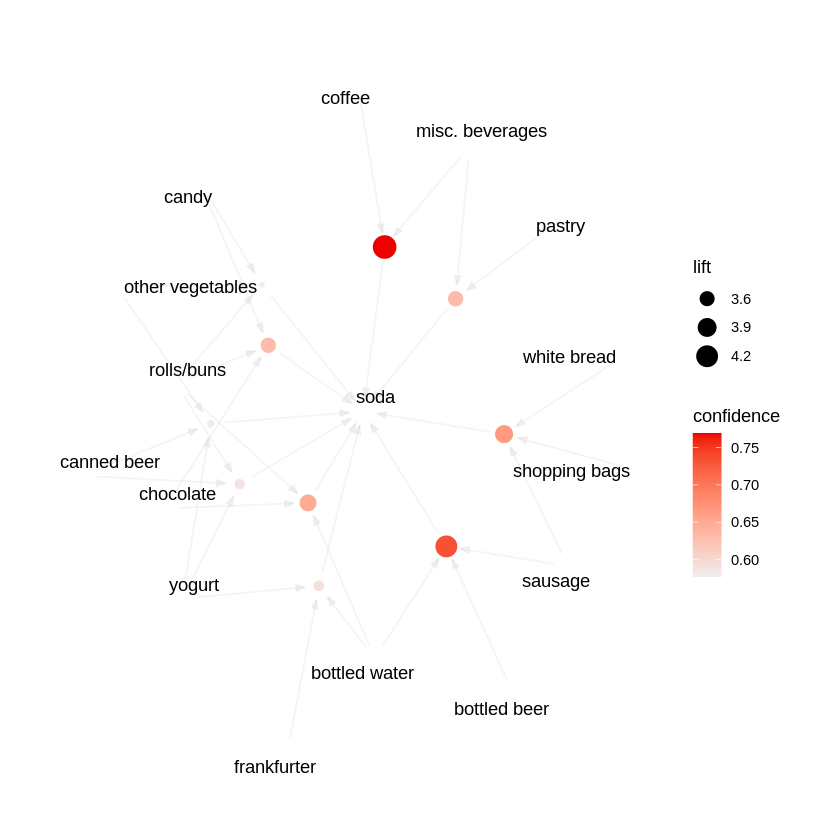

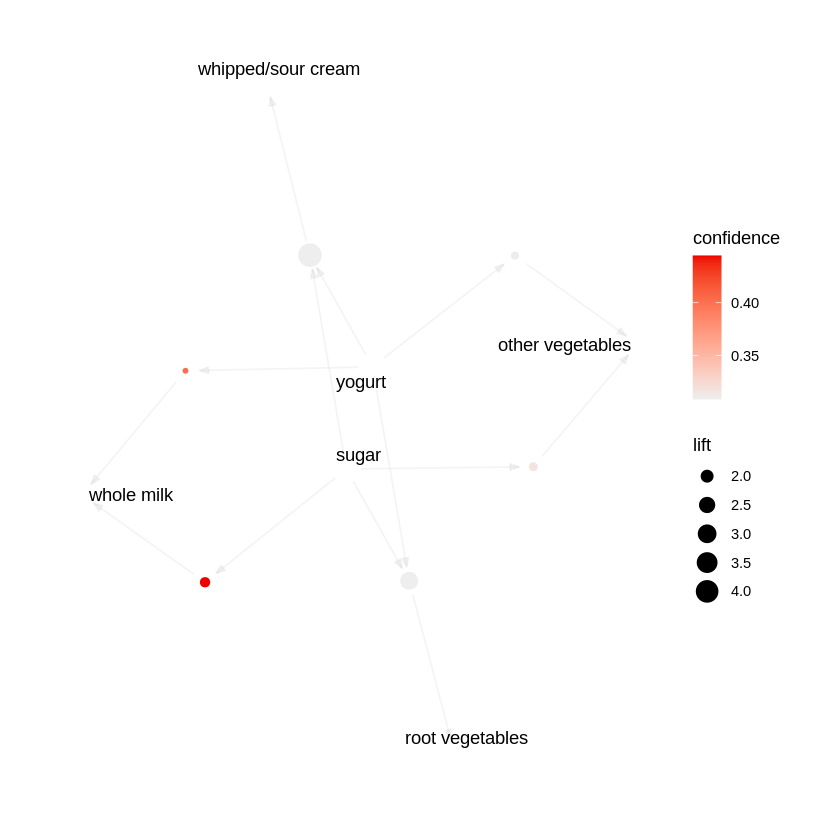

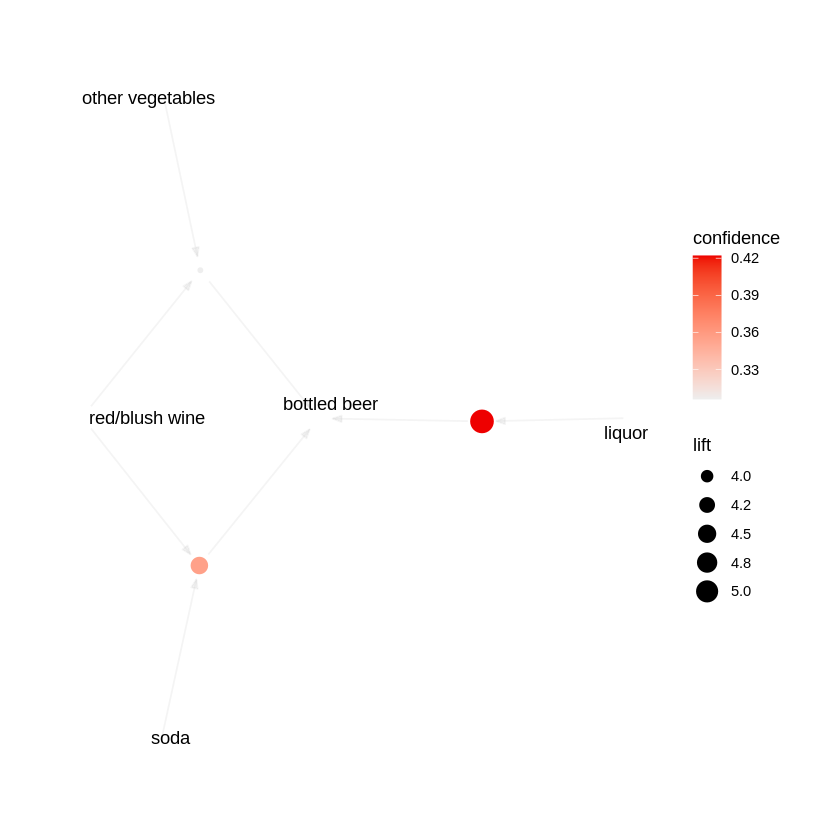

In [147]:
#규칙 시각화
#아래는 신뢰도 바탕, 향상도 시각화
plot(rule_soda[1:10],method="graph", measure="lift", shading="confidence")
plot(rule_yogurt_sugar,method="graph", measure="lift", shading="confidence")
plot(rule_beer,method="graph", measure="lift", shading="confidence")

1. SODA 규칙에서 COFFE와 MICS BEVERAGES가 가장 높은 향상도 신뢰도 보임, 그 다음 SAUSAGE
2. YOGURT or SUGOR규칙에서 WHOLE MILK가 가장 높은 향상도 신뢰도 보임
3. BEER 규착에서 에서 liquor과 red wine이 가장 높은 향샹도, 신뢰도 보여줌
4. 이는 앞선 분석 결과와 같다.


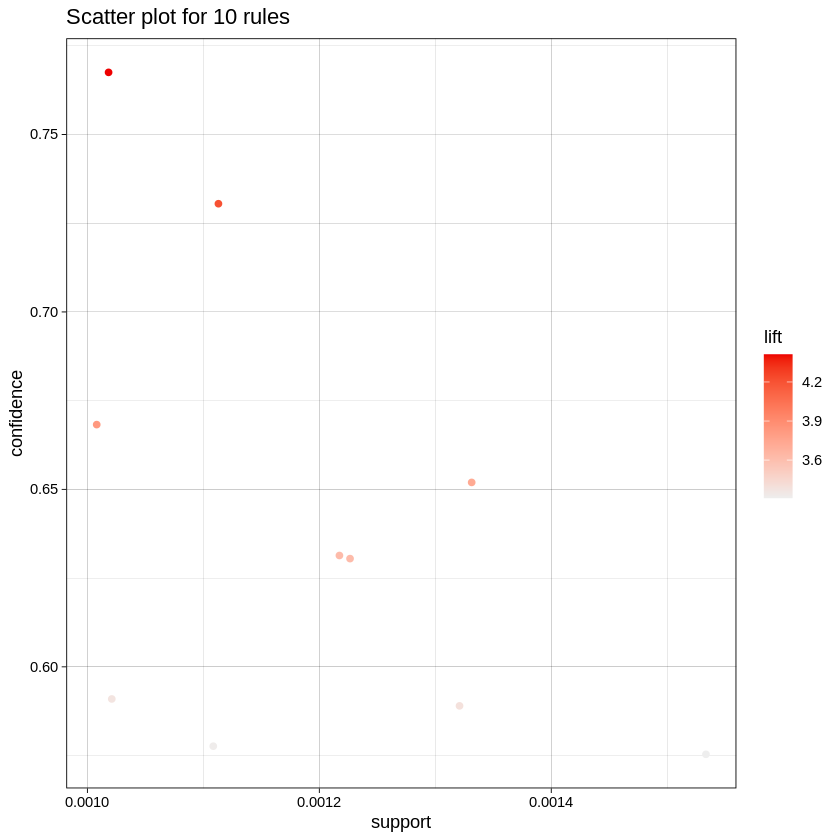

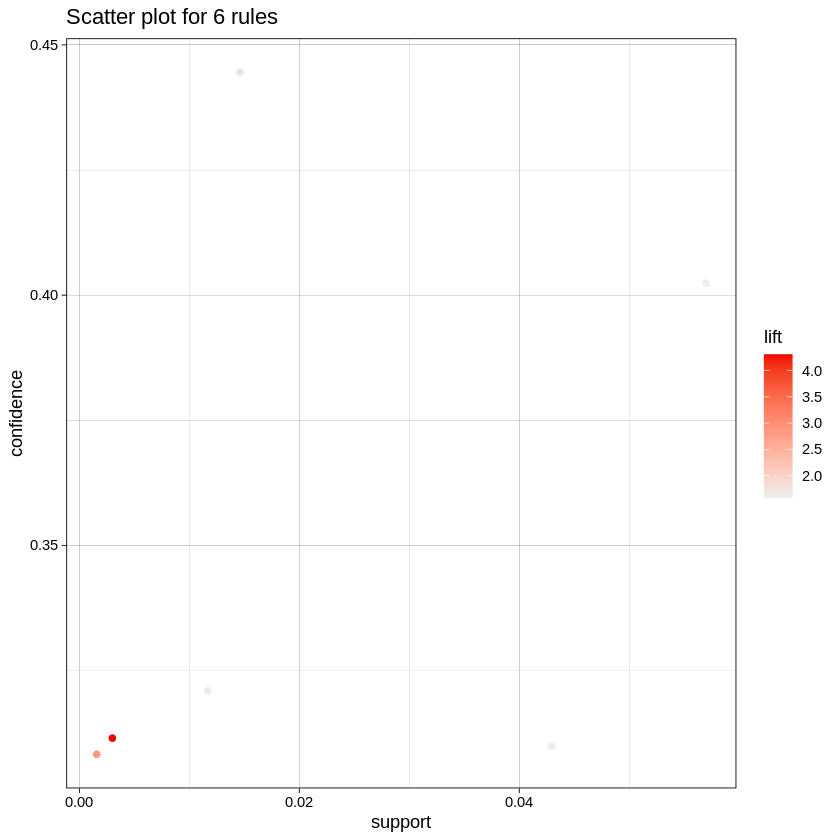

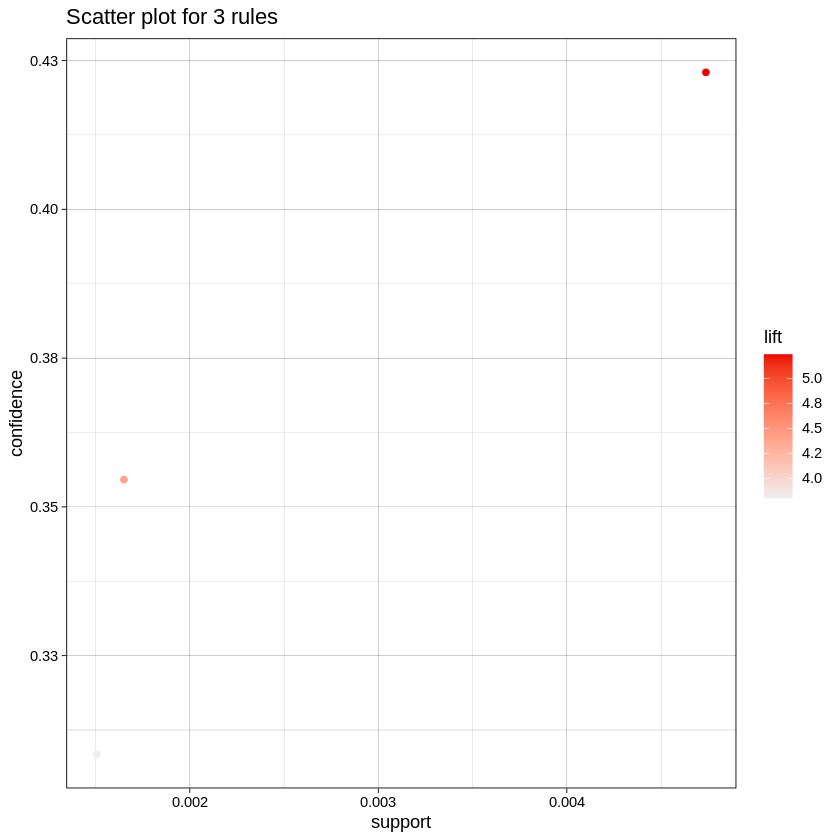

In [150]:
plot(rule_soda[1:10],jitter = 1)
plot(rule_yogurt_sugar,jitter = 1)
plot(rule_beer,jitter = 1)

1. 각 규칙의 지지도와 신뢰도간의 관계를 보여준다.
2. SODA 규칙에서 지지도와 신뢰도는 비교적 음의관계, 신뢰도의 스케일이 지지도보다 큼
2. YOGURT or SUGOR규칙은 지지도와 신뢰도 모두 비교절 작은 바운더리 안에 있음
3. BEER 규칙은 비교적 양의 관계


To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.

To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.



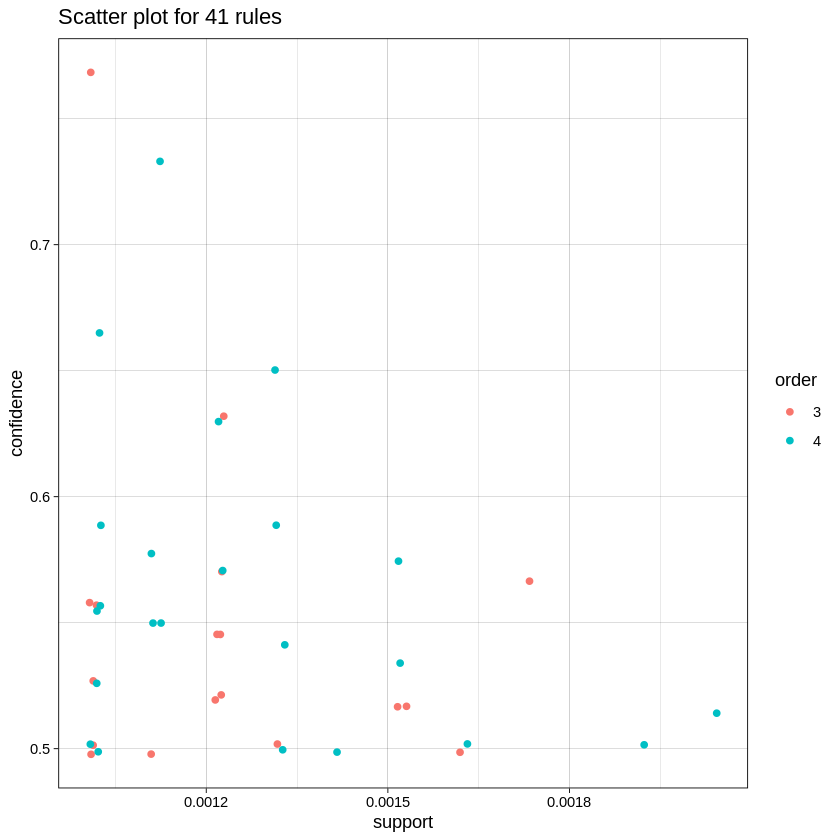

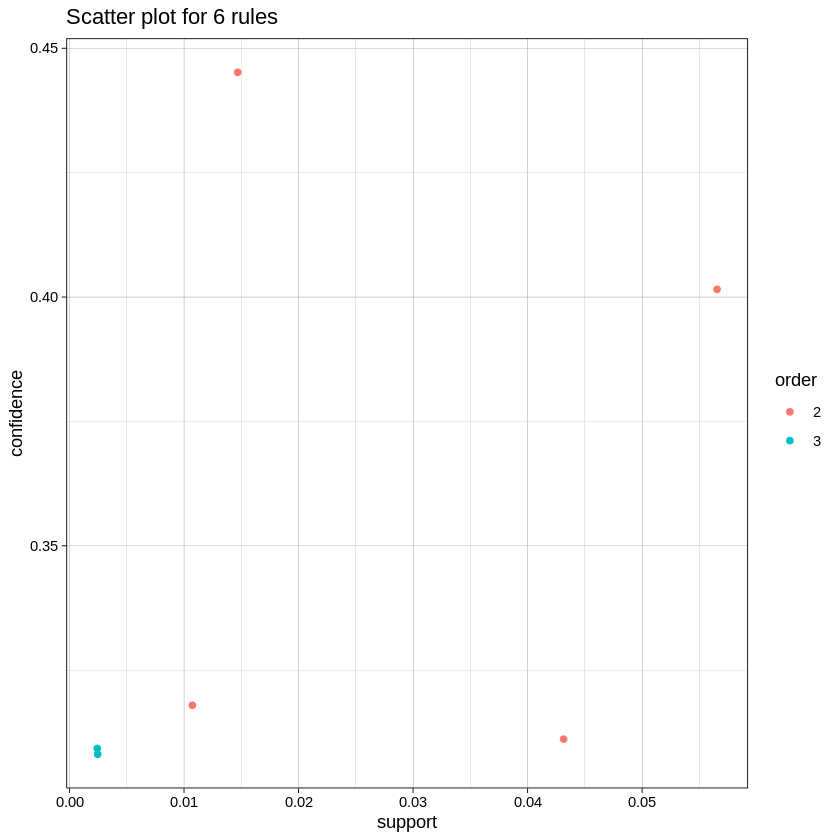

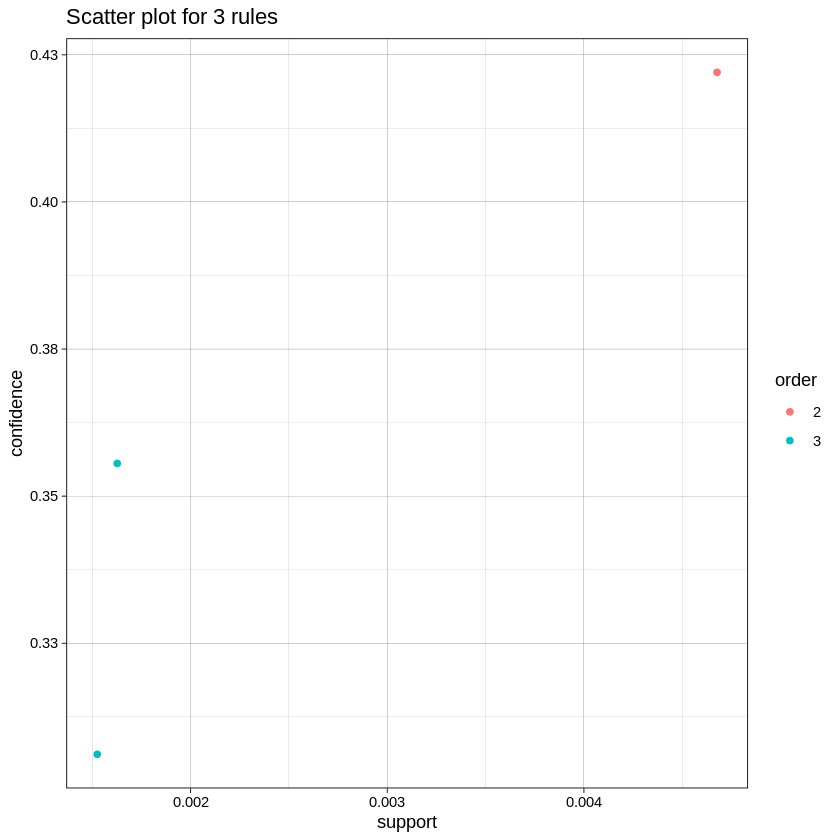

In [153]:
plot(rule_soda, shading = "order")
plot(rule_yogurt_sugar ,shading= "order") 
plot(rule_beer, shading = "order") 

1. 각 규칙에 대한 주문 건수에 따른 시각화
2. 제일 높은 규칙을 더 적게 구매함 ;; 
3. 차 순위를 선택할 수 있을까?
4. 이 부분은 더 공부가 필요할 것 같음


[ref1.추천화시스템-03연관분석(Association Analysis)알고리즘](https://velog.io/@redgem92/%EC%B6%94%EC%B2%9C%ED%99%94-%EC%8B%9C%EC%8A%A4%ED%85%9C-03.-%EC%97%B0%EA%B4%80%EB%B6%84%EC%84%9DAssociation-Analysis-%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98)<BR>
[ref2. recommendation_system
](https://github.com/pray92/recommendation_system) <br>
ref3. R로 마스터하는 머신러닝. 코리 레스마이스터. p337-382<br>
[ref4.지지도](https://rfriend.tistory.com/191)<br>
[re5. 시각화](https://rpubs.com/Bidhansubedi7/834608) <br>
ref6. https://cran.r-project.org/web/packages/arulesViz/vignettes/arulesViz.pdf